In [1]:
import pandas as pd

# Load your dataset
data = pd.read_csv('filtered_data.csv')

display(data)

,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
0,2002,Corn,PHILIPPINES,Average,5430,1377,4008,10815,13554,8124,6747,2739,0.25,5.65,1915,7.08,81285572,2.08
1,2002,Corn,PHILIPPINES,Dry,5255,1355,4535,11145,14096,8841,7486,2951,0.26,5.59,1994,7.07,81285572,2.08
2,2002,Corn,PHILIPPINES,Wet,5594,1398,3516,10508,13046,7452,6054,2538,0.24,5.7,1842,7.08,81285572,2.08
3,2002,Palay,PHILIPPINES,Average,9325,6964,5068,21357,27483,18158,11194,6126,0.29,6.7,3188,8.62,81285572,2.08
4,2002,Palay,PHILIPPINES,Dry,9106,6982,5466,21554,27394,18288,11306,5840,0.27,6.91,3118,8.79,81285572,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021,Corn,PHILIPPINES,Dry,..,..,..,..,..,..,..,..,..,..,..,..,113880328,1.51
116,2021,Corn,PHILIPPINES,Wet,..,..,..,..,..,..,..,..,..,..,..,..,113880328,1.51
117,2021,Palay,PHILIPPINES,Average,24258,12709,12953,49920,69600,45341,32632,19680,0.39,12.02,4154,..,113880328,1.51
118,2021,Palay,PHILIPPINES,Dry,23450,12281,12434,48166,71022,47572,35290,22856,0.47,11.48,4197,..,113880328,1.51


In [2]:
# Check for missing values in the merged dataset
data.isnull().sum()

Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                0
Population                               0
Annual % Change                          0
dtype: int64

In [3]:
data.dtypes

Year                                       int64
Type                                      object
Geolocation                               object
Season                                    object
CASH COSTS                                object
NON-CASH COSTS                            object
IMPUTED COSTS                             object
TOTAL COSTS                               object
GROSS RETURNS                             object
RETURNS ABOVE CASH COSTS                  object
RETURNS ABOVE CASH AND NON-CASH COSTS     object
NET RETURNS                               object
NET PROFIT-COST RATIO                     object
Cost per kilogram (pesos)                 object
Yield per hectare (kg)                    object
Farmgate price (pesos/kg)                 object
Population                                 int64
Annual % Change                          float64
dtype: object

In [4]:
# Convert object columns to numeric, forcing errors to NaN (in case of any non-numeric values)
columns_to_convert = ['CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS',
                      'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS',
                      'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
                      'Farmgate price (pesos/kg)']

# Convert the columns to numeric, forcing errors='coerce' to handle any invalid parsing
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [5]:
data.isnull().sum()

Year                                      0
Type                                      0
Geolocation                               0
Season                                    0
CASH COSTS                               26
NON-CASH COSTS                           26
IMPUTED COSTS                            26
TOTAL COSTS                              26
GROSS RETURNS                            26
RETURNS ABOVE CASH COSTS                 26
RETURNS ABOVE CASH AND NON-CASH COSTS    26
NET RETURNS                              26
NET PROFIT-COST RATIO                    26
Cost per kilogram (pesos)                26
Yield per hectare (kg)                   26
Farmgate price (pesos/kg)                36
Population                                0
Annual % Change                           0
dtype: int64

In [6]:
data.dtypes

Year                                       int64
Type                                      object
Geolocation                               object
Season                                    object
CASH COSTS                               float64
NON-CASH COSTS                           float64
IMPUTED COSTS                            float64
TOTAL COSTS                              float64
GROSS RETURNS                            float64
RETURNS ABOVE CASH COSTS                 float64
RETURNS ABOVE CASH AND NON-CASH COSTS    float64
NET RETURNS                              float64
NET PROFIT-COST RATIO                    float64
Cost per kilogram (pesos)                float64
Yield per hectare (kg)                   float64
Farmgate price (pesos/kg)                float64
Population                                 int64
Annual % Change                          float64
dtype: object

In [7]:
data.head()

,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
0,2002,Corn,PHILIPPINES,Average,5430.0,1377.0,4008.0,10815.0,13554.0,8124.0,6747.0,2739.0,0.25,5.65,1915.0,7.08,81285572,2.08
1,2002,Corn,PHILIPPINES,Dry,5255.0,1355.0,4535.0,11145.0,14096.0,8841.0,7486.0,2951.0,0.26,5.59,1994.0,7.07,81285572,2.08
2,2002,Corn,PHILIPPINES,Wet,5594.0,1398.0,3516.0,10508.0,13046.0,7452.0,6054.0,2538.0,0.24,5.70,1842.0,7.08,81285572,2.08
3,2002,Palay,PHILIPPINES,Average,9325.0,6964.0,5068.0,21357.0,27483.0,18158.0,11194.0,6126.0,0.29,6.70,3188.0,8.62,81285572,2.08
4,2002,Palay,PHILIPPINES,Dry,9106.0,6982.0,5466.0,21554.0,27394.0,18288.0,11306.0,5840.0,0.27,6.91,3118.0,8.79,81285572,2.08


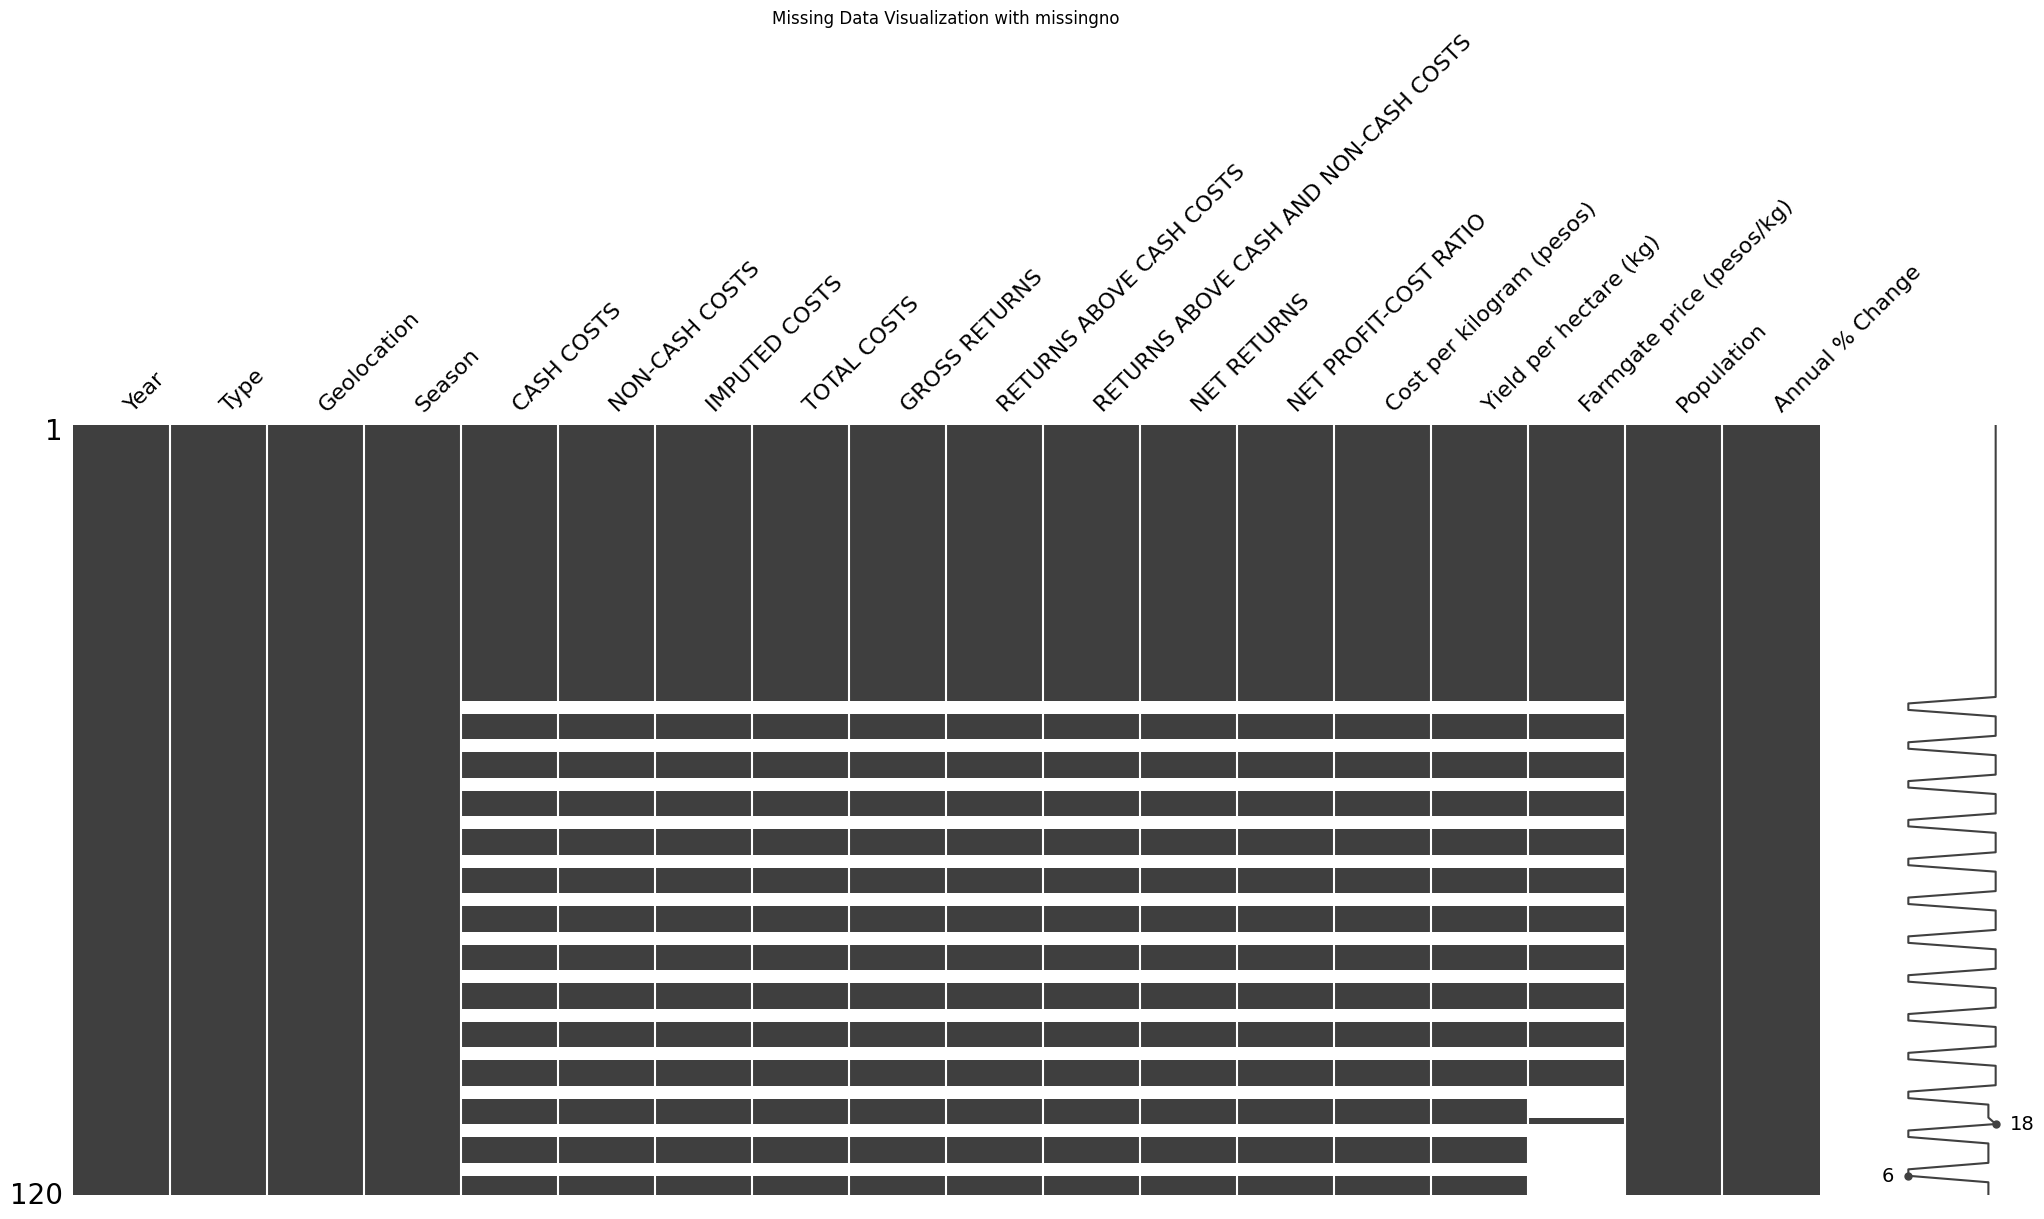

In [8]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data using missingno
msno.matrix(data)
plt.title('Missing Data Visualization with missingno')
plt.show()

In [9]:
# Impute the specified columns using median imputation first
columns_to_impute_median = ['CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS',
                            'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS',
                            'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
                            'Farmgate price (pesos/kg)']

# Apply median imputation
data[columns_to_impute_median] = data[columns_to_impute_median].fillna(data[columns_to_impute_median].median())

# Now check how many missing values remain
data.isnull().sum()


Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                0
Population                               0
Annual % Change                          0
dtype: int64

In [10]:
import seaborn as sns

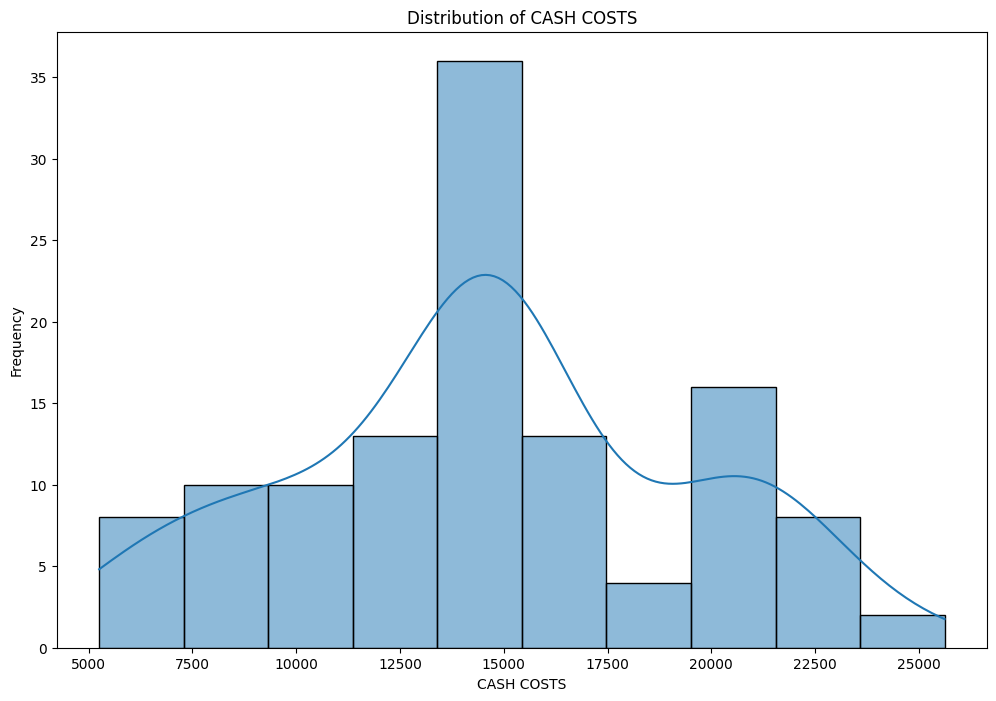

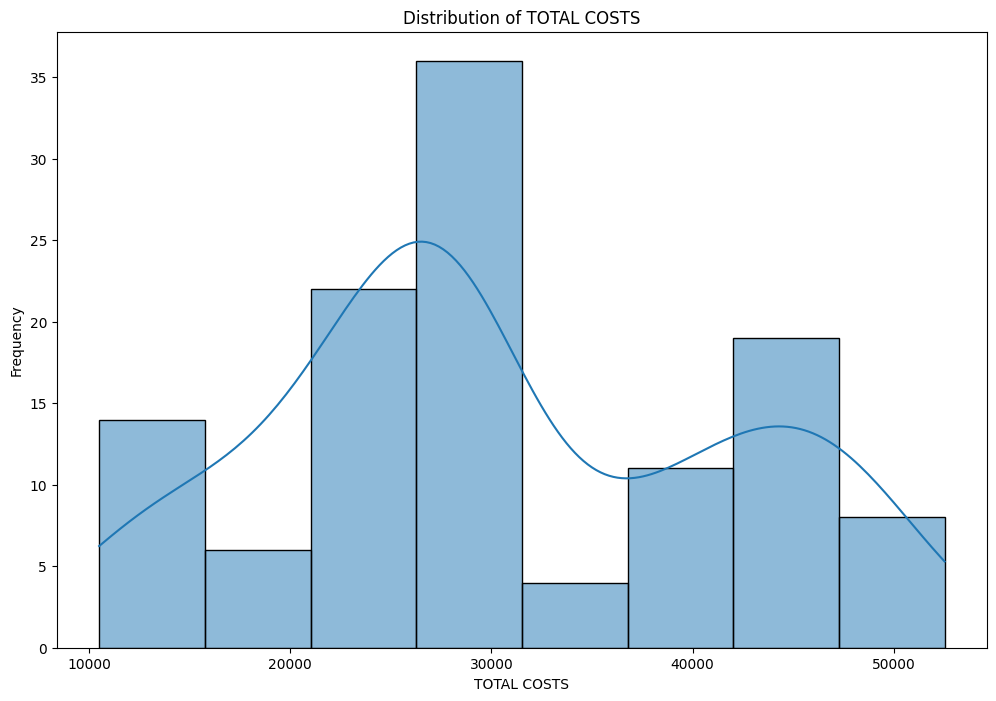

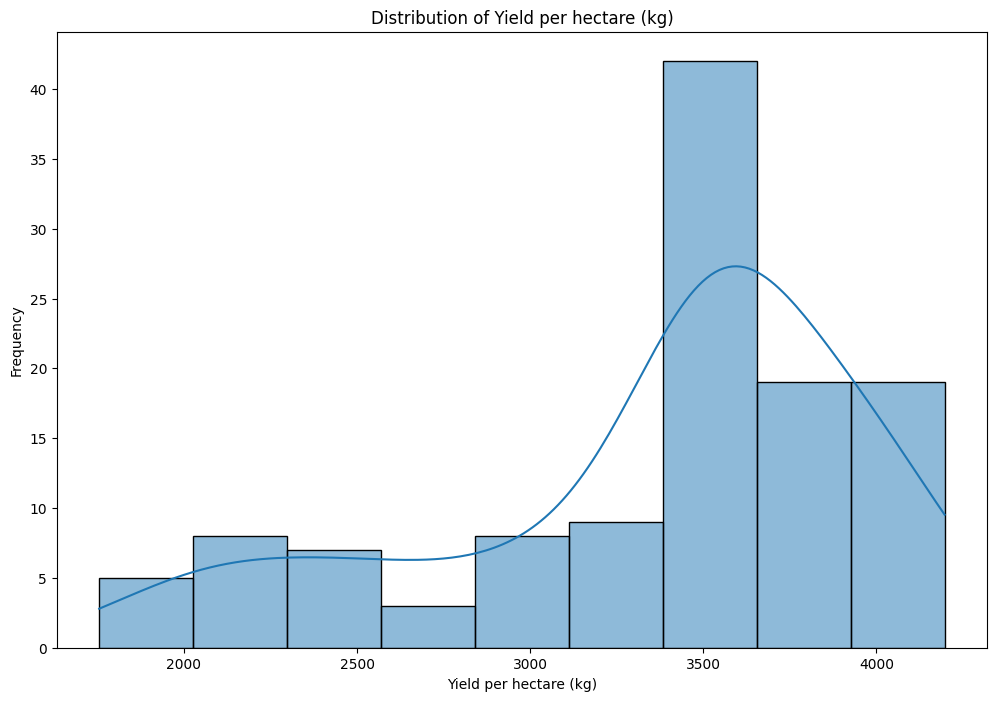

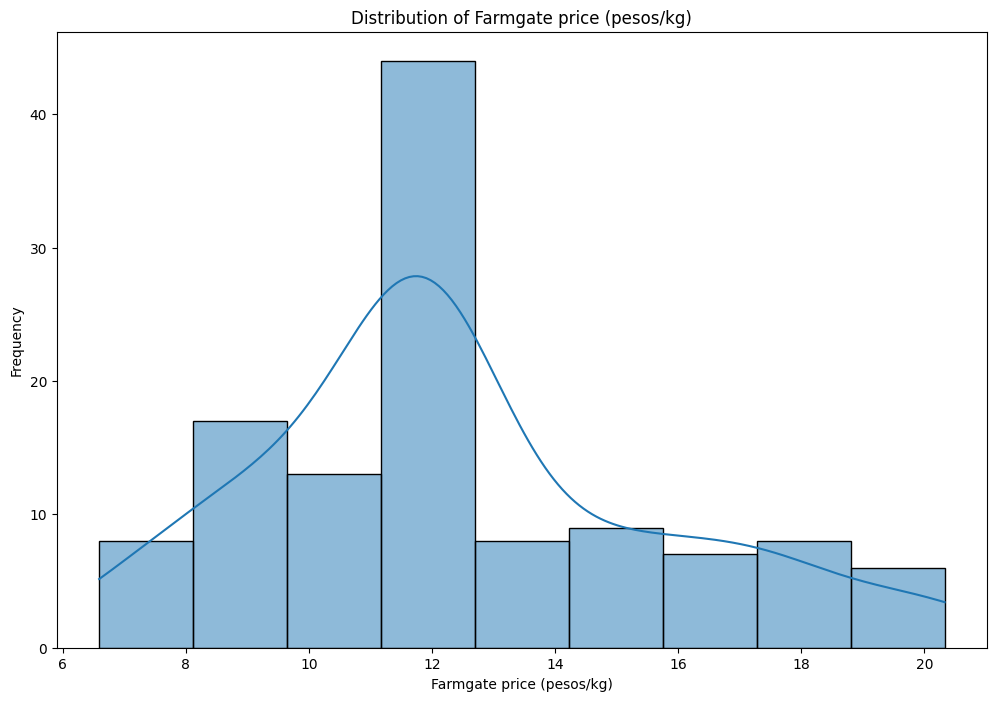

In [11]:
# Plot distribution of key numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(data['CASH COSTS'], kde=True)
plt.title('Distribution of CASH COSTS')
plt.xlabel('CASH COSTS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['TOTAL COSTS'], kde=True)
plt.title('Distribution of TOTAL COSTS')
plt.xlabel('TOTAL COSTS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Yield per hectare (kg)'], kde=True)
plt.title('Distribution of Yield per hectare (kg)')
plt.xlabel('Yield per hectare (kg)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Farmgate price (pesos/kg)'], kde=True)
plt.title('Distribution of Farmgate price (pesos/kg)')
plt.xlabel('Farmgate price (pesos/kg)')
plt.ylabel('Frequency')
plt.show()

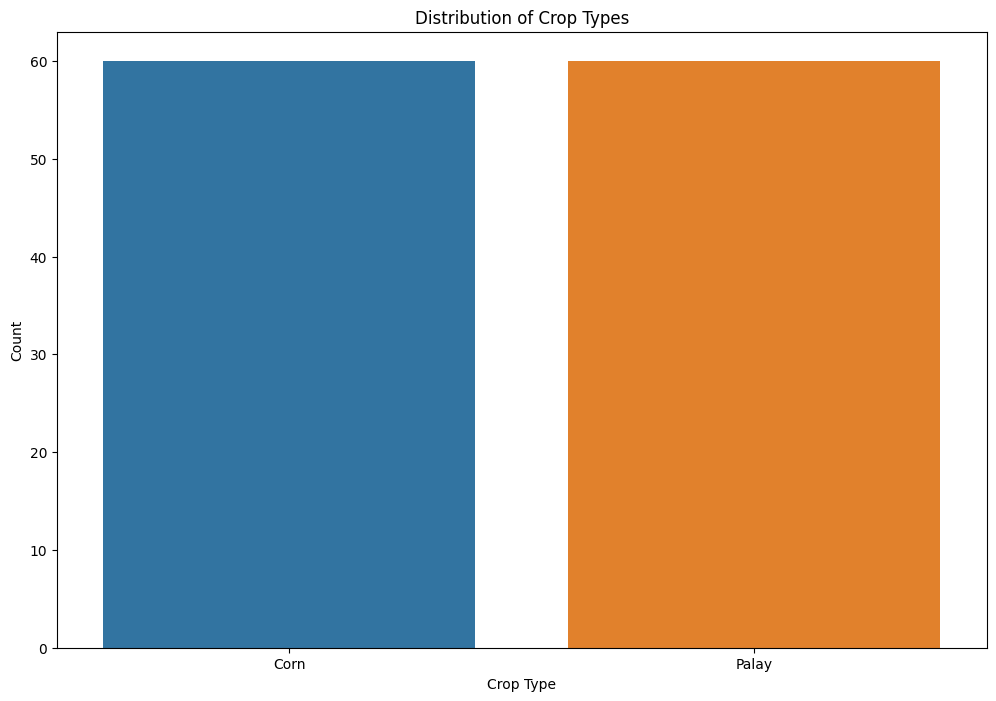

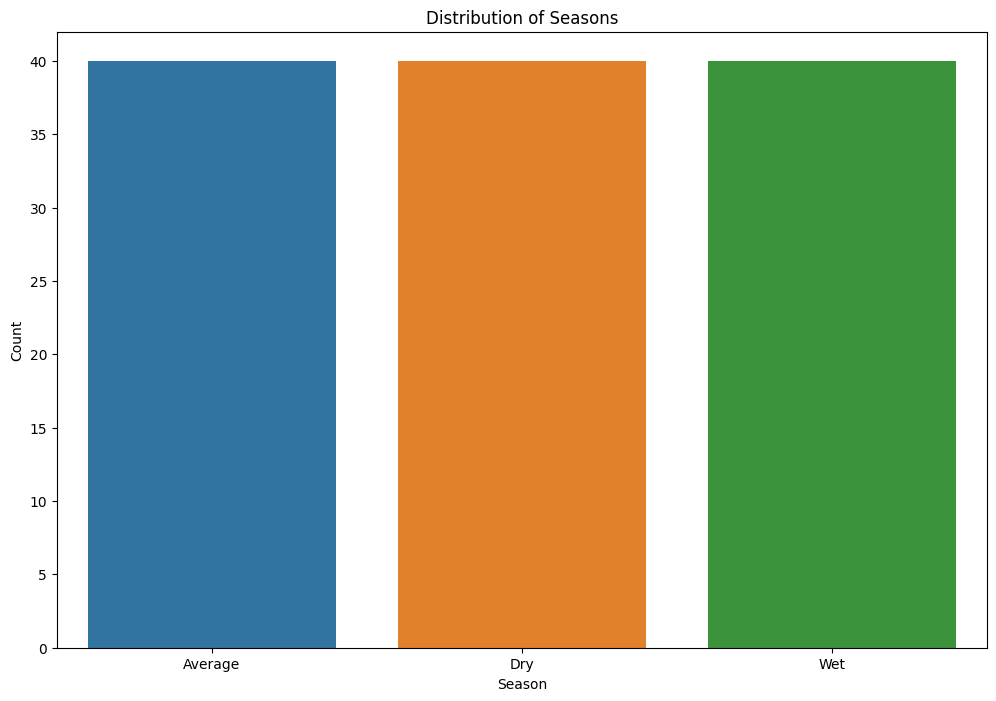

In [12]:
# Plot categorical variable 'Type'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Type')
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

# Plot categorical variable 'Season'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Season')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

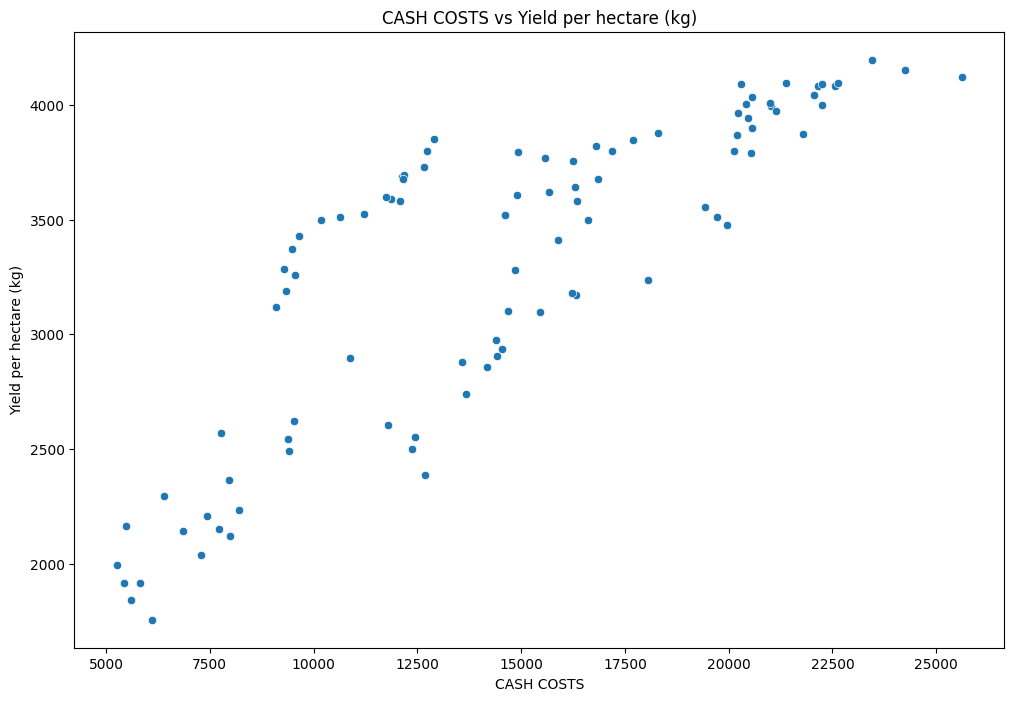

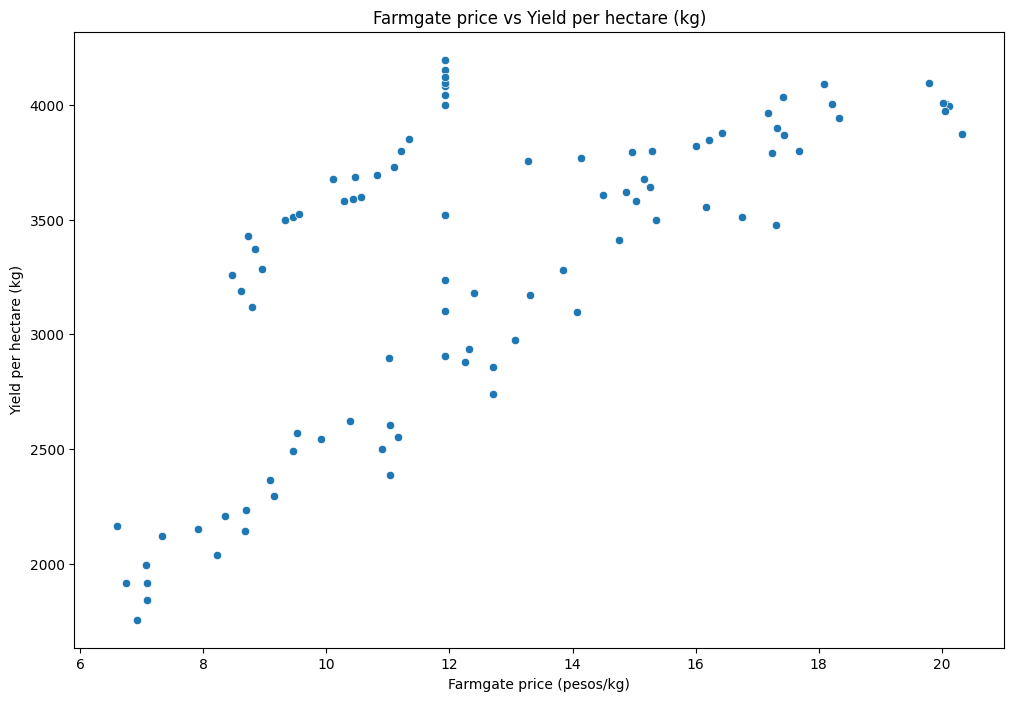

In [13]:
# Scatterplot: CASH COSTS vs Gross Returns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='CASH COSTS', y='Yield per hectare (kg)')
plt.title('CASH COSTS vs Yield per hectare (kg)')
plt.xlabel('CASH COSTS')
plt.ylabel('Yield per hectare (kg)')
plt.show()

# Scatterplot: Farmgate price vs Gross Returns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Farmgate price (pesos/kg)', y='Yield per hectare (kg)')
plt.title('Farmgate price vs Yield per hectare (kg)')
plt.xlabel('Farmgate price (pesos/kg)')
plt.ylabel('Yield per hectare (kg)')
plt.show()


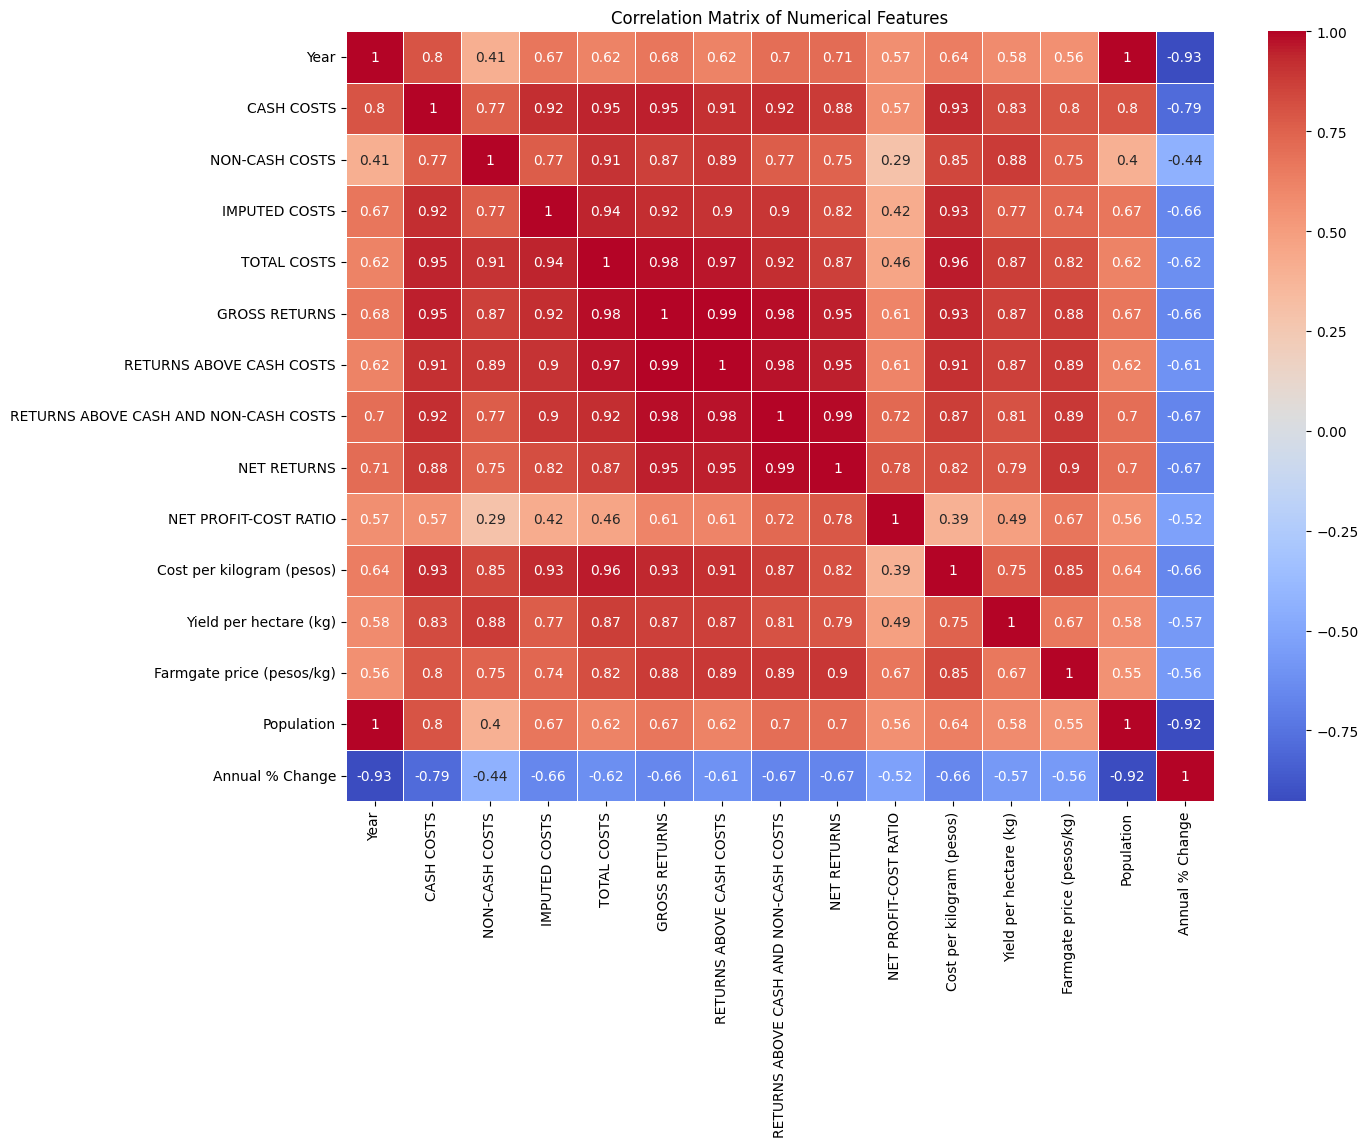

In [14]:
# Select only the numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Generate a correlation matrix for the numerical features
correlation_matrix = numeric_columns.corr()

# Set up the plot for a heatmap
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

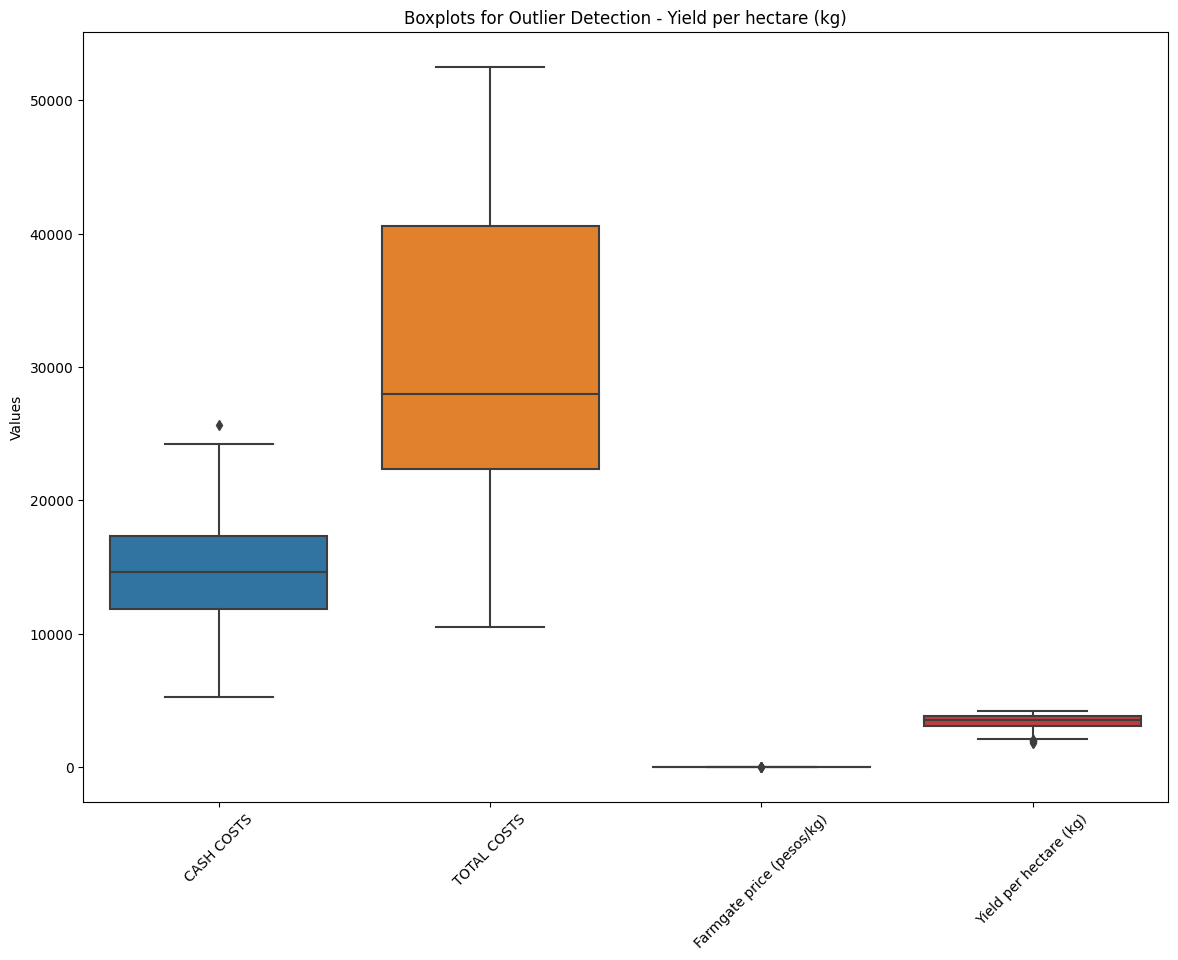

In [15]:
# Set up the figure for outlier detection using boxplots
plt.figure(figsize=(14, 10))

# Create boxplots for key numerical features to visualize outliers
sns.boxplot(data=data[['CASH COSTS', 'TOTAL COSTS', 'Farmgate price (pesos/kg)', 'Yield per hectare (kg)']])
plt.title('Boxplots for Outlier Detection - Yield per hectare (kg)')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Generate summary statistics for the numerical features
summary_statistics = data.describe()

# Display the summary statistics
summary_statistics

,Year,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000
mean,2011.500000,14628.708333,8550.300000,7826.283333,30321.141667,44443.35000,29961.300000,21749.566667,14169.108333,0.423833,8.953167,3349.716667,12.425583,9.732290e+07,1.805500
std,5.790459,4748.692169,4730.003611,2279.588117,11077.371577,17888.98672,13425.955413,9392.596474,7402.802306,0.139013,1.951299,613.206285,3.261699,9.925387e+06,0.145918
min,2002.000000,5255.000000,1306.000000,3516.000000,10508.000000,12162.00000,6056.000000,4708.000000,457.000000,0.040000,5.430000,1755.000000,6.590000,8.128557e+07,1.510000
25%,2006.750000,11854.500000,2502.750000,6152.750000,22371.000000,33055.25000,21107.000000,15262.250000,8766.750000,0.370000,7.365000,3099.500000,10.452500,8.914649e+07,1.695000
50%,2011.500000,14616.000000,9079.000000,7427.500000,27965.000000,41797.00000,27858.000000,20341.500000,14048.500000,0.400000,8.675000,3518.500000,11.925000,9.718512e+07,1.795000
75%,2016.250000,17312.250000,12494.750000,9044.500000,40581.750000,57651.75000,39478.500000,25749.500000,16994.500000,0.480000,10.827500,3790.000000,14.220000,1.053411e+08,1.892500
max,2021.000000,25621.000000,17558.000000,13656.000000,52524.000000,81031.00000,59645.000000,46289.000000,35012.000000,0.810000,12.750000,4197.000000,20.330000,1.138803e+08,2.080000


In [17]:
# Function to cap outliers based on IQR
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    column_capped = column.clip(lower=lower_bound, upper=upper_bound)
    return column_capped

# Capping outliers for the selected numerical features
data['CASH COSTS'] = cap_outliers(data['CASH COSTS'])
data['TOTAL COSTS'] = cap_outliers(data['TOTAL COSTS'])
data['Farmgate price (pesos/kg)'] = cap_outliers(data['Farmgate price (pesos/kg)'])
data['Yield per hectare (kg)'] = cap_outliers(data['Yield per hectare (kg)'])  # Added to cap outliers in GROSS RETURNS

# Check the summary statistics after capping outliers to see the effect
summary_statistics_after_capping = data.describe()

# Display the summary statistics after capping
summary_statistics_after_capping


,Year,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000
mean,2011.500000,14627.690625,8550.300000,7826.283333,30321.141667,44443.35000,29961.300000,21749.566667,14169.108333,0.423833,8.953167,3357.404167,12.415219,9.732290e+07,1.805500
std,5.790459,4746.329076,4730.003611,2279.588117,11077.371577,17888.98672,13425.955413,9392.596474,7402.802306,0.139013,1.951299,595.308558,3.237256,9.925387e+06,0.145918
min,2002.000000,5255.000000,1306.000000,3516.000000,10508.000000,12162.00000,6056.000000,4708.000000,457.000000,0.040000,5.430000,2063.750000,6.590000,8.128557e+07,1.510000
25%,2006.750000,11854.500000,2502.750000,6152.750000,22371.000000,33055.25000,21107.000000,15262.250000,8766.750000,0.370000,7.365000,3099.500000,10.452500,8.914649e+07,1.695000
50%,2011.500000,14616.000000,9079.000000,7427.500000,27965.000000,41797.00000,27858.000000,20341.500000,14048.500000,0.400000,8.675000,3518.500000,11.925000,9.718512e+07,1.795000
75%,2016.250000,17312.250000,12494.750000,9044.500000,40581.750000,57651.75000,39478.500000,25749.500000,16994.500000,0.480000,10.827500,3790.000000,14.220000,1.053411e+08,1.892500
max,2021.000000,25498.875000,17558.000000,13656.000000,52524.000000,81031.00000,59645.000000,46289.000000,35012.000000,0.810000,12.750000,4197.000000,19.871250,1.138803e+08,2.080000


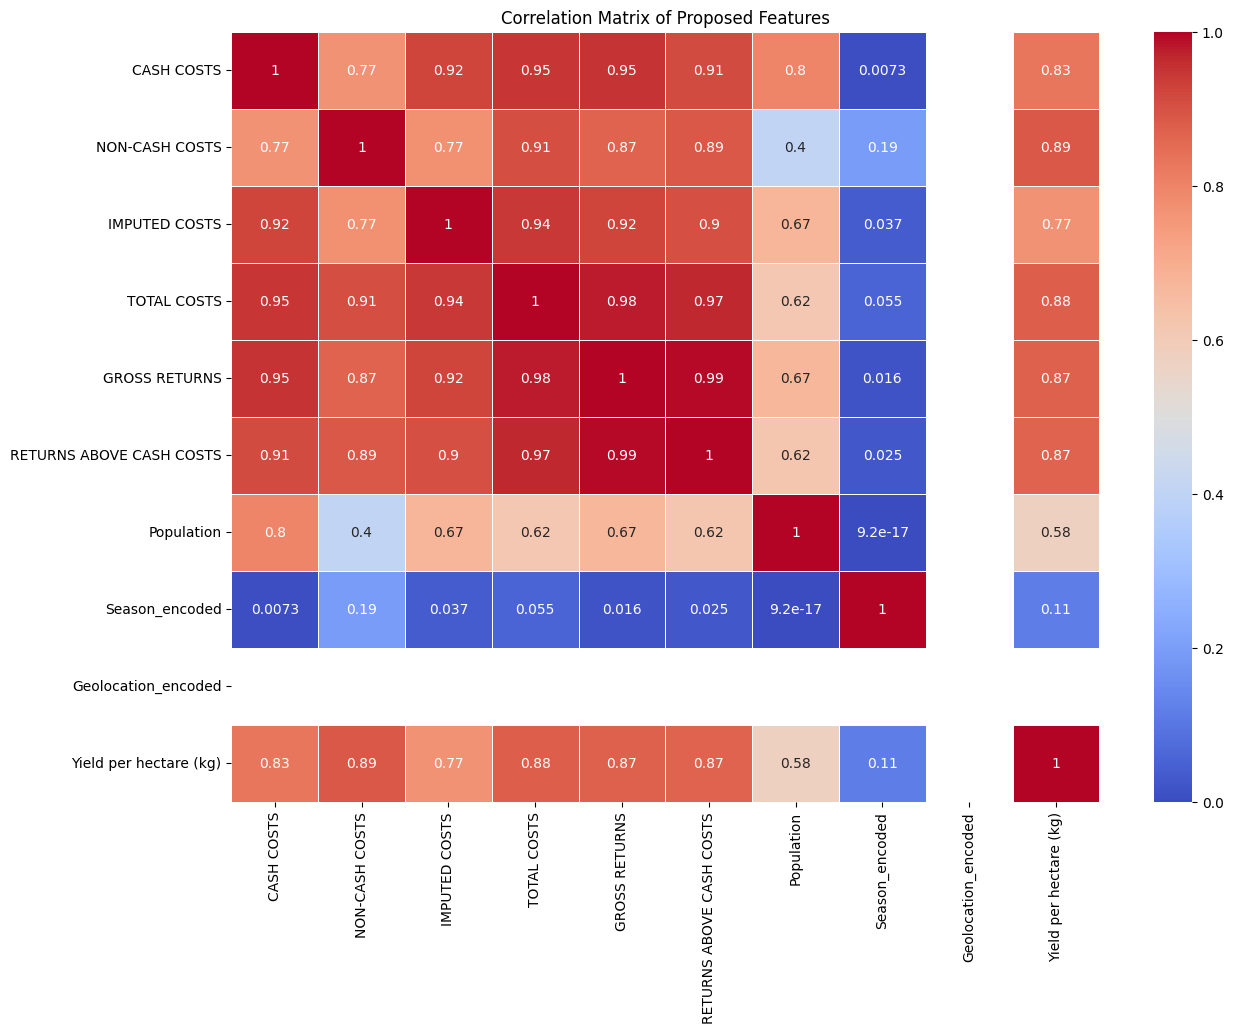

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode 'Season' and 'Geolocation'
data['Season_encoded'] = label_encoder.fit_transform(data['Season'])
data['Geolocation_encoded'] = label_encoder.fit_transform(data['Geolocation'])

# Now retry the correlation analysis on the proposed features
proposed_features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 
    'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 'Population', 
    'Season_encoded', 'Geolocation_encoded', 'Yield per hectare (kg)'
]

# Generate a correlation matrix for the proposed features
correlation_matrix_proposed = data[proposed_features].corr()

# Set up the plot for a heatmap of the proposed features' correlation matrix
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix for proposed features
sns.heatmap(correlation_matrix_proposed, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Proposed Features')
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder

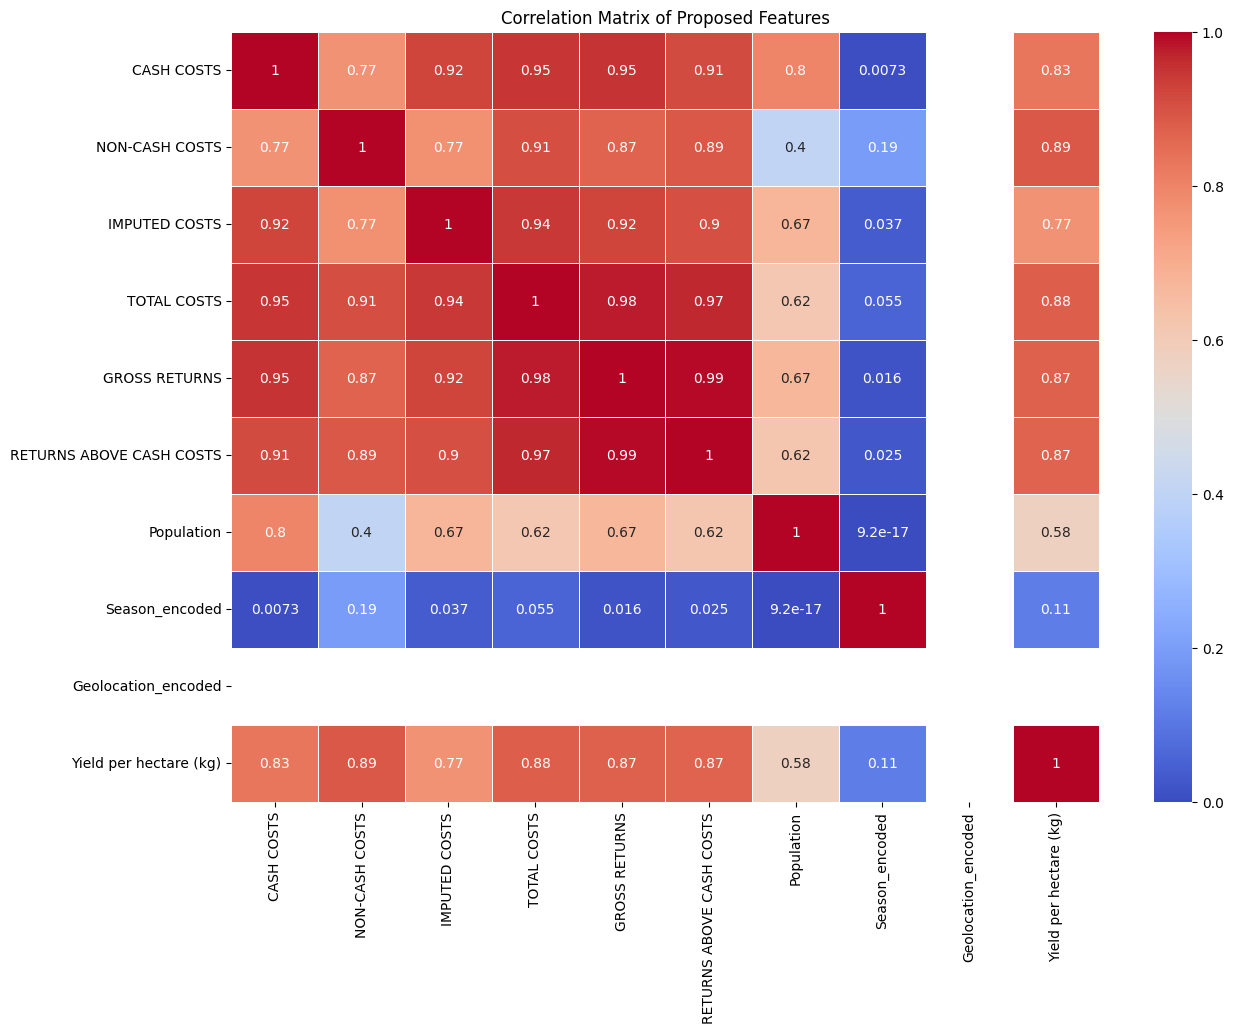

In [20]:
# Re-encode the categorical columns 'Season' and 'Geolocation' to ensure they are present
label_encoder = LabelEncoder()

# Create encoded versions of 'Season' and 'Geolocation'
data['Season_encoded'] = label_encoder.fit_transform(data['Season'])
data['Geolocation_encoded'] = label_encoder.fit_transform(data['Geolocation'])

# Now retry the correlation analysis on the proposed features
proposed_features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 
    'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 'Population', 
    'Season_encoded', 'Geolocation_encoded', 'Yield per hectare (kg)'
]

# Generate a correlation matrix for the numerical features
correlation_matrix_proposed = data[proposed_features].corr()

# Set up the plot for a heatmap of the proposed features' correlation matrix
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix for proposed features
sns.heatmap(correlation_matrix_proposed, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Proposed Features')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

# Convert 'Year' to integer if it's not already
data['Year'] = data['Year'].astype(int)

# Define training and testing sets based on the year
train_data = data[data['Year'].between(2002, 2011)]
test_data = data[data['Year'].between(2012, 2021)]

# Select the features and target variable
features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 
    'TOTAL COSTS', 'RETURNS ABOVE CASH COSTS', 
    'Population', 'Season_encoded', 'GROSS RETURNS'
]
target_variable = 'Yield per hectare (kg)'

# Split the features and target variable into X_train, X_test, y_train, y_test
X_train = train_data[features]
y_train = train_data[target_variable]
X_test = test_data[features]
y_test = test_data[target_variable]

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((60, 8), (60, 8), (60,), (60,))

## FINAL MODEL

In [22]:
# Ensure y_train and X_train have a valid RangeIndex (starting from 0)
y_train.index = pd.RangeIndex(start=0, stop=len(y_train), step=1)
X_train.index = pd.RangeIndex(start=0, stop=len(X_train), step=1)

# Adjust y_test and X_test similarly
y_test.index = pd.RangeIndex(start=len(y_train), stop=len(y_train) + len(y_test), step=1)
X_test.index = pd.RangeIndex(start=len(X_train), stop=len(X_train) + len(X_test), step=1)


In [34]:
from sklearn.model_selection import GridSearchCV
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from skforecast.model_selection import backtesting_forecaster
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np


In [24]:
# Define the hyperparameter grid for the RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

In [25]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)


In [26]:
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=2)


In [27]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



# Initialize the RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(**best_params, random_state=42)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_

In [28]:
# Get the worst hyperparameters
cv_results = grid_search.cv_results_
worst_index = np.argmin(cv_results['mean_test_score'])  # Worst performance corresponds to the highest negative MSE
worst_params = cv_results['params'][worst_index]
print("Worst Hyperparameters:", worst_params)

Worst Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [29]:
forecaster = ForecasterAutoreg(
    regressor=best_rf,
    lags=12  # Keep the lags as per your prior setting
)

# Re-train the forecaster on the training data
forecaster.fit(y=y_train, exog=X_train)


In [30]:

# Step 6: Backtesting with best hyperparameters
initial_train_size = int(len(y_train) * 0.8)
steps = 10

# Perform backtesting
mse, predictions = backtesting_forecaster(
    forecaster=forecaster,
    y=y_train,  
    exog=X_train,  
    initial_train_size=initial_train_size,
    steps=steps,
    refit=True,  
    metric='mean_squared_error'
)


  0%|          | 0/2 [00:00<?, ?it/s]

In [31]:
# Make predictions on the test set using the optimized model
y_pred_optimized = forecaster.predict(steps=len(y_test), exog=X_test)


In [37]:
# Calculate MSE and R2 on the test set with the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

print(f"Best Hyperparameters: {best_params}")
print(f"MAE with optimized model: {mae_optimized}")
print(f"MSE with optimized model: {mse_optimized}")
print(f"R^2 with optimized model: {r2_optimized}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
MAE with optimized model: 154.39724999999999
MSE with optimized model: 44147.55864208334
R^2 with optimized model: 0.6622720689607682


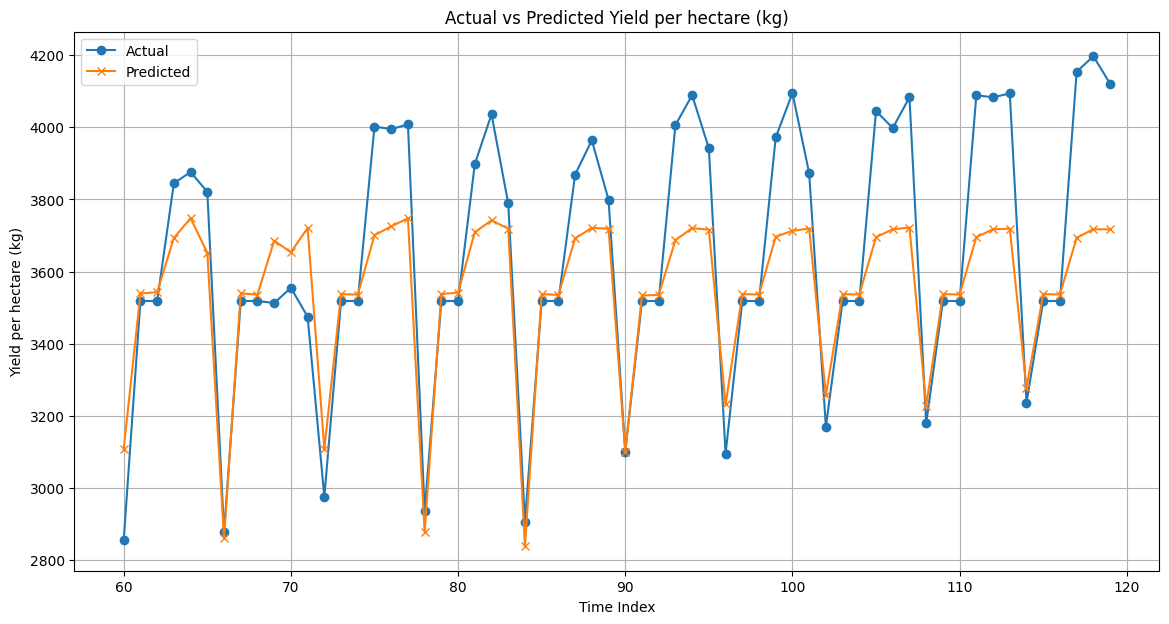

In [33]:
# Assuming y_pred_optimized and y_test are already aligned and have the same length
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_optimized, label='Predicted', marker='x')
plt.title('Actual vs Predicted Yield per hectare (kg)')
plt.xlabel('Time Index')
plt.ylabel('Yield per hectare (kg)')
plt.legend()
plt.grid(True)
plt.show()

- #####  The dashed line at zero represents the ideal scenario where predicted values perfectly match the actual values (no error). Points above this line represent overestimations by your model, while points below indicate underestimations. The presence of large spikes both above and below the zero line suggests significant variance in the prediction accuracy across different instances. Larger spikes indicate greater discrepancies between predicted and actual values.